# TOV EVOLUTION: K

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import kuibit.cactus_scalars as cs
import kuibit.simdir as sd

from kuibit import grid_data as gd

from IPython.display import HTML
import matplotlib.animation as animation

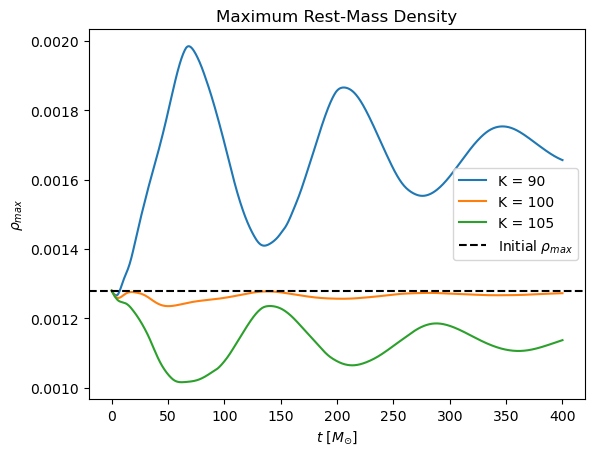

In [2]:
filenames = ["./TOV_K_90/", './TOV_example_original/', "./TOV_K_105/"]
K = [90, 100, 105]
for filename, kappa in zip(filenames, K):
    sim = sd.SimDir(filename)
    timeseries = sim.timeseries
    rho_max = timeseries.maximum.fields.rho
    plt.plot(rho_max, label=r"K = " + str(kappa))

plt.axhline(rho_max.values[0], linestyle = '--', color = 'black', label = r'Initial $\rho_{max}$')
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel(r'$\rho_{max}$')
plt.legend()
plt.title('Maximum Rest-Mass Density')
plt.savefig('density K.png', dpi = 300)
plt.show()

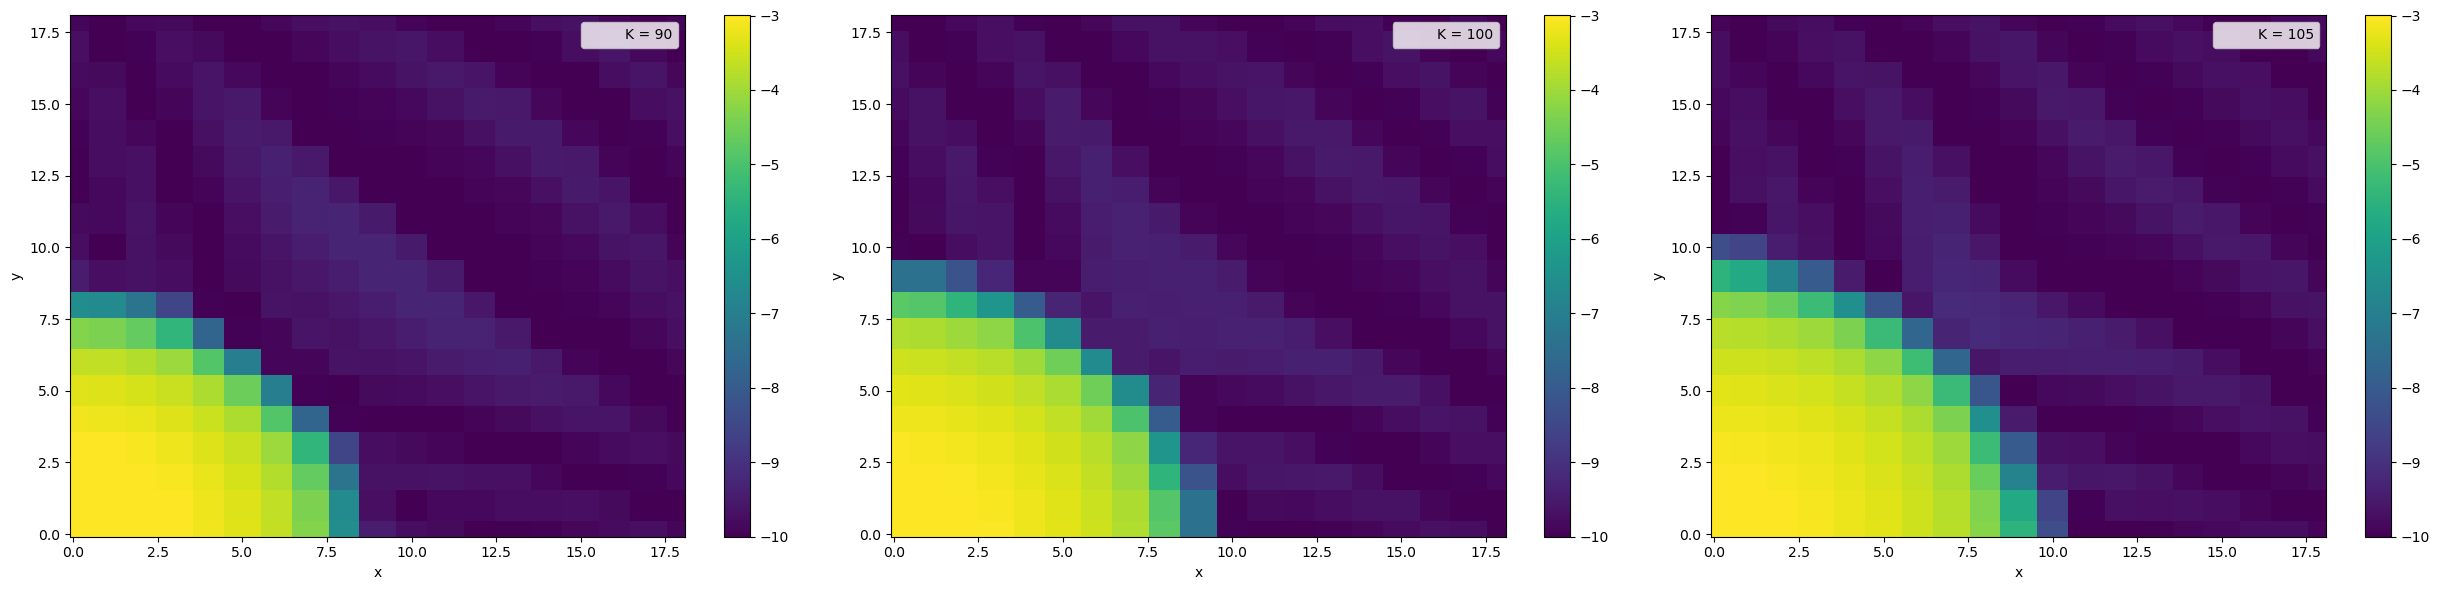

In [3]:
i = 0
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

fig = plt.figure(figsize = (25, 6))
for filename, kappa in zip(filenames, K):  
    sim = sd.SimDir(filename)
    ax = fig.add_subplot(130+int(i+1))
    gf = sim.gf
    vars2D = gf.xy
    rho = vars2D.fields.rho
    small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18]) #lower left, upper right coordinates
    rho_small = rho.read_on_grid(rho.iterations[-1], small_grid)
    cf = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
    plt.colorbar(cf)
    plt.xlabel('x')
    plt.ylabel('y')
    i = i+1
    legend_patch = mpatches.Patch(color = 'none', label=r'K = '+str(kappa))
    ax.legend(handles=[legend_patch])

plt.tight_layout()
plt.savefig('grid K.png', dpi = 300)
plt.show()

In [4]:
sim_90 = sd.SimDir(filenames[0])
ax_90 = fig.add_subplot(131)
gf_90 = sim_90.gf
vars2D_90 = gf_90.xy
rho_90 = vars2D_90.fields.rho

sim_100 = sd.SimDir(filenames[1])
ax_100 = fig.add_subplot(133)
gf_100 = sim_100.gf
vars2D_100 = gf_100.xy
rho_100 = vars2D_100.fields.rho

sim_105 = sd.SimDir(filenames[2])
ax_105 = fig.add_subplot(132)
gf_105 = sim_105.gf
vars2D_105 = gf_105.xy
rho_105 = vars2D_105.fields.rho

fig, (ax_90, ax_100, ax_105) = plt.subplots(1, 3, figsize=(15, 5))
ims = []

ax_90.set_xlabel(r'$x (M_\odot)$')
ax_90.set_ylabel(r'$y (M_\odot)$')
ax_90.set_aspect('equal')
ax_100.set_xlabel(r'$x (M_\odot)$')
ax_100.set_ylabel(r'$y (M_\odot)$')
ax_100.set_aspect('equal')
ax_105.set_xlabel(r'$x (M_\odot)$')
ax_105.set_ylabel(r'$y (M_\odot)$')
ax_105.set_aspect('equal')


title_90 = ax_90.text(0.5, 1.05, f'K = 90', size=plt.rcParams["axes.titlesize"], ha="center", transform=ax_90.transAxes)
title_100 = ax_100.text(0.5, 1.05, f'K = 100', size=plt.rcParams["axes.titlesize"], ha="center", transform=ax_100.transAxes)
title_105 = ax_105.text(0.5, 1.05,f'K = 105',size=plt.rcParams["axes.titlesize"], ha="center",transform=ax_105.transAxes)

for i in rho.iterations[0::1]:
    rho_small_90 = rho_90.read_on_grid(i, small_grid)
    rho_small_100 = rho_100.read_on_grid(i, small_grid)
    rho_small_105 = rho_105.read_on_grid(i, small_grid)

    suptitle = ax_100.text(0.5, 1.15, f'Time = {rho.available_times[i//2048]}',
                            size=plt.rcParams["axes.titlesize"], ha="center",
                            transform=ax_100.transAxes, animated=True)
    
    im_90 = ax_90.pcolormesh(*rho_small_90.coordinates_meshgrid(), np.log10(rho_small_90.data_xyz), animated=True, vmin=-10, vmax=-3)
    im_100 = ax_100.pcolormesh(*rho_small_100.coordinates_meshgrid(), np.log10(rho_small_100.data_xyz), animated=True, vmin=-10, vmax=-3)
    im_105 = ax_105.pcolormesh(*rho_small_105.coordinates_meshgrid(), np.log10(rho_small_105.data_xyz), animated=True, vmin=-10, vmax=-3)

    ims.append([im_90, im_100, im_105, title_90, title_100, title_105, suptitle])
    plt.close()    

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False, repeat_delay=1000)
HTML(ani.to_jshtml())

In [5]:
ani.save("TOV_evolution_K.gif", writer='pillow',fps=60)